# AAttribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


In [2]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt

In [3]:
#Importing Data
bank = pd.read_csv("C:\\Excelr Data\\Assignments\\Logestic Regression\\bank-full.csv")

In [4]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
bank['marital'] = bank['marital'].apply(lambda x: 0 if x=='single' else 1)
bank['default'] = bank['default'].apply(lambda x: 0 if x=='no' else 1)
bank['housing'] = bank['housing'].apply(lambda x: 0 if x=='no' else 1)
bank['loan'] = bank['loan'].apply(lambda x: 0 if x=='no' else 1)
bank['y'] = bank['y'].apply(lambda x: 0 if x=='no' else 1)


In [10]:
def month_converter(mnth):
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    return months.index(mnth) + 1
bank['month'] = bank['month'].apply(lambda x: month_converter(x))


In [11]:
bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
bank.job.unique() 

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [13]:
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  

In [14]:
# Encode labels in column 'species'. 
bank.job = label_encoder.fit_transform(bank.job) 
bank.job.unique() 
bank.education = label_encoder.fit_transform(bank.education) 
bank.education.unique() 
bank.contact = label_encoder.fit_transform(bank.contact) 
bank.contact.unique() 
bank.poutcome = label_encoder.fit_transform(bank.poutcome) 
bank.poutcome.unique() 


array([3, 0, 1, 2])

In [15]:
bank.education.value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

In [16]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,9,0,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,3,0
4,33,11,0,3,0,1,0,0,2,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,11,977,3,-1,0,3,1
45207,71,5,1,0,0,1729,0,0,0,17,11,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,11,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,11,508,4,-1,0,3,0


In [17]:
#Model building 
import statsmodels.formula.api as sm
logit_model = sm.logit('y~age+job+marital+education+default+balance+housing+loan+contact+day+month+duration+campaign+pdays+poutcome+previous',data = bank).fit()


Optimization terminated successfully.
         Current function value: 0.267303
         Iterations 8


In [18]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45194
Method:                           MLE   Df Model:                           16
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:                  0.2593
Time:                        18:50:41   Log-Likelihood:                -12085.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3695      0.130    -25.903      0.000      -3.624      -3.115
age            0.0111      0.002      6.505      0.000       0.008       0.014
job            0.0056      0.005      1.048      0.295      -0.005       0.016
marital       -0.4172      0.041    -10.138      0.000      -0.498      -0.337
education      0.1916      0.023      8.292      0.000       0.146       0.237
default       -0.3643      0.161     -2.269      0.023      -0.679      -0.050
balance     2.019e-05   4.54e-06      4.447      0.000    1.13e-05    2.91e-05
housing       -0.9963      0.038    -26.331      0.000      -1.070      -0.922
loan          -0.6848      0.057    -12.005      0.000      -0.797      -0.573
contact       -0.6035      0.026    -22.852      0.000      -0.655      -0.552
day           -0.0046      0.002     -2.223      0.026      -0.009      -0.001
month         -0.0073      0.006     -1.125      0.261      -0.020       0.005
duration       0.0039    6.1e-05     64.613      0.000       0.004       0.004
campaign      -0.1368      0.010    -13.648      0.000      -0.156      -0.117
pdays          0.0036      0.000     14.042      0.000       0.003       0.004
poutcome       0.2199      0.029      7.523      0.000       0.163       0.277
previous       0.0908      0.008     11.282      0.000       0.075       0.107
==============================================================================
"""

In [19]:
y_pred = logit_model.predict(bank)
y_pred

0        0.032004
1        0.022162
2        0.004742
3        0.017367
4        0.088390
           ...   
45206    0.762827
45207    0.286056
45208    0.910771
45209    0.168793
45210    0.443971
Length: 45211, dtype: float64

In [20]:
bank["pred_prob"] = y_pred

In [21]:
# filling all the cells with zeroes
bank["Att_val"] = 0


In [22]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
bank.loc[y_pred>=0.5,"Att_val"] = 1
bank.Att_val

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    0
45208    1
45209    0
45210    0
Name: Att_val, Length: 45211, dtype: int64

In [23]:
from sklearn.metrics import classification_report
classification_report(bank.Att_val,bank.y)


'              precision    recall  f1-score   support\n\n           0       0.98      0.90      0.94     43281\n           1       0.22      0.60      0.32      1930\n\n    accuracy                           0.89     45211\n   macro avg       0.60      0.75      0.63     45211\nweighted avg       0.95      0.89      0.91     45211\n'

In [24]:
# confusion matrix 
confusion_matrix = pd.crosstab(bank['y'],bank.Att_val)
confusion_matrix


Att_val,0,1
y,,
0,39147,775
1,4134,1155


In [25]:
accuracy = (39147+1155)/(39147+1155+4134+775) # 89.14%
accuracy

0.891420229590144

In [26]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(bank.y, y_pred)


Text(0, 0.5, 'True Positive')

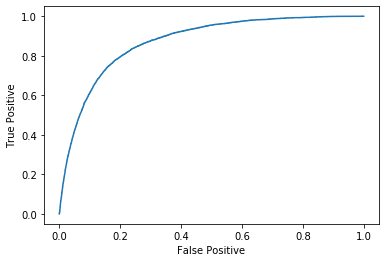

In [27]:
# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
 

In [28]:
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 
roc_auc #0.87188

0.8718887631600092

## Dividing data into train and test data sets

In [29]:
### Dividing data into train and test data sets
bank.drop("Att_val",axis=1,inplace=True)

In [30]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(bank,test_size=0.3)

In [31]:
# checking na values 
train.isnull().sum();test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
pred_prob    0
dtype: int64

In [32]:
# Building a model on train data set 

train_model = sm.logit('y~age+job+marital+education+default+balance+housing+loan+contact+day+month+duration+campaign+pdays+previous+poutcome', data = train).fit()


Optimization terminated successfully.
         Current function value: 0.267712
         Iterations 8


In [33]:
#summary
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31630
Method:                           MLE   Df Model:                           16
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:                  0.2575
Time:                        18:51:30   Log-Likelihood:                -8472.3
converged:                       True   LL-Null:                       -11410.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3793      0.156    -21.693      0.000      -3.685      -3.074
age            0.0111      0.002      5.457      0.000       0.007       0.015
job            0.0045      0.006      0.707      0.479      -0.008       0.017
marital       -0.4202      0.049     -8.548      0.000      -0.517      -0.324
education      0.1938      0.028      7.004      0.000       0.140       0.248
default       -0.3007      0.189     -1.591      0.112      -0.671       0.070
balance     2.009e-05   5.17e-06      3.884      0.000    9.95e-06    3.02e-05
housing       -0.9398      0.045    -20.859      0.000      -1.028      -0.851
loan          -0.6489      0.067     -9.657      0.000      -0.781      -0.517
contact       -0.5997      0.031    -19.045      0.000      -0.661      -0.538
day           -0.0047      0.002     -1.893      0.058      -0.009       0.000
month         -0.0116      0.008     -1.495      0.135      -0.027       0.004
duration       0.0040   7.34e-05     54.062      0.000       0.004       0.004
campaign      -0.1518      0.012    -12.174      0.000      -0.176      -0.127
pdays          0.0034      0.000     10.916      0.000       0.003       0.004
previous       0.1107      0.010     11.591      0.000       0.092       0.129
poutcome       0.2324      0.035      6.661      0.000       0.164       0.301
==============================================================================
"""

In [34]:
train_pred = train_model.predict(train.iloc[:,0:])
# print(train.iloc[:,0:])
# Creating new column for storing predicted class of Attorney


In [35]:
# filling all the cells with zeroes
train["train_pred"] = np.zeros(31647)

C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
# taking threshold value as 0.5 and above the prob value will be treated as correct value

train.loc[train_pred>0.5,"train_pred"] = 1

C:\Users\deshp\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [37]:
# confusion matrix 
confusion_matrix = pd.crosstab(train['y'],train.train_pred)
confusion_matrix

train_pred,0.0,1.0
y,,
0,27419,531
1,2900,797


In [38]:
accuracy_train = (27352+827)/(27352+827+554+2914) # 89.04
accuracy_train


0.8904161531898758

In [39]:
# Prediction on Test data set

test_pred = train_model.predict(test)


In [40]:
# Creating new column for storing predicted class of Attorney

# filling all the cells with zeroes
test["test_pred"] = np.zeros(13564)


C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
test.loc[test_pred>0.5,"test_pred"] = 1

C:\Users\deshp\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [42]:
# confusion matrix 
confusion_matrix = pd.crosstab(test['y'],test.test_pred)
confusion_matrix

test_pred,0.0,1.0
y,,
0,11718,254
1,1227,365


In [43]:
accuracy_test = (11784+342)/(11784+342+232+1206) # 88.39%
accuracy_test

0.8939840754939545

In [44]:
# ROC curve 
from sklearn import metrics
 #fpr => false positive rate
 #tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(test.y, test_pred)# actual value,pedicted value


Text(0, 0.5, 'True Positive')

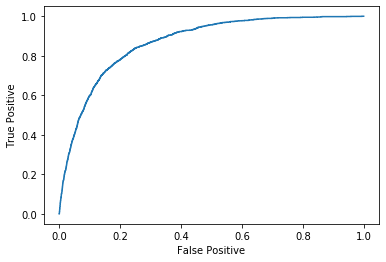

In [44]:
# the above function is applicable for binary classification class 
plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")